k-NN
4
(70000, 784)
(70000,)
Erreur: 0.066000


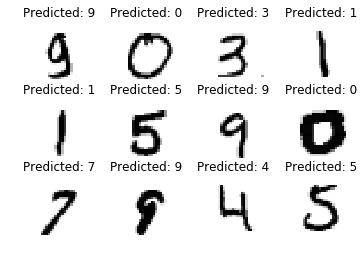

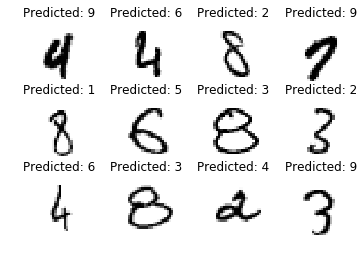

In [2]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as panda
import matplotlib.pyplot as plt
'''
# On charge le dataset
house_data = panda.read_csv('house.csv')

# On affiche le nuage de points dont on dispose
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=1)
plt.show()

# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].as_matrix()]).T
y = np.matrix(house_data['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

plt.xlabel('Surface')
plt.ylabel('Loyer')

plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)

# On affiche la droite entre 0 et 250

plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')

plt.show()

theta.item(0) + theta.item(1) * 35

from sklearn import linear_model
regr = linear_model.LinearRegression()

X = [[0], [1], [2], [3]]
Y = [0, 4, 8, 12]
regr.fit(X, Y)
regr.predict(4)

print("sampling de données")
data_size = len(house_data)
print(data_size)
sample = np.random.randint(data_size, size=10)
print(sample)

sampled_data = house_data['surface'][sample]
print(sampled_data)

print("splitting de données training dataset vs testing dataset")

x = [0, 1, 2, 3, 4, 5]
y = [0, 4, 8, 12, 17, 22]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.5)

print(ytrain)

'''

# k-NN
print("k-NN")

from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home="./")
print(len(mnist))

# Le dataset principal qui contient toutes les images
print(mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print(mnist.target.shape)


sample = np.random.randint(70000, size=5000)
data = mnist.data[sample]
target = mnist.target[sample]

#sklearn.utils.resample pour eviter les doublons
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8, test_size=0.2)

from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

'''
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()
'''

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % predicted[value])

plt.show()

# on récupère les données mal prédites 
misclass = (ytest != predicted)
misclass_images = images[misclass,:,:]
misclass_predicted = predicted[misclass]

# on sélectionne un échantillon de ces images
select = np.random.randint(misclass_images.shape[0], size=12)

# on affiche les images et les prédictions (erronées) associées à ces images
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: %i' % misclass_predicted[value])

plt.show()